In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datos_FEAT_SEL.data")
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min,previous_loans_CNT_PAYMENT_sum,previous_loans_NFLAG_LAST_APPL_IN_DAY_mean,client_credit_AMT_INST_MIN_REGULARITY_max_mean,client_credit_SK_DPD_DEF_max_min,client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean,client_credit_AMT_PAYMENT_CURRENT_max_sum,client_installments_AMT_INSTALMENT_mean_sum,client_credit_AMT_DRAWINGS_CURRENT_min_mean,previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,NaN,24.0,1.0,NaN,NaN,NaN,NaN,219625.695,NaN,0.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,NaN,30.0,1.0,NaN,NaN,NaN,NaN,1618864.650,NaN,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,21288.465,NaN,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,138.0,1.0,0.0,0.0,0.0,0.0,1007153.415,0.0,0.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,NaN,124.0,1.0,NaN,NaN,NaN,NaN,835985.340,NaN,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1296 entries, NAME_CONTRACT_TYPE to previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
dtypes: float64(1240), int64(40), object(16)
memory usage: 98.9+ MB


In [4]:
y = df['TARGET']
y

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: TARGET, Length: 10000, dtype: int64

In [5]:
y.value_counts()

TARGET
0    9225
1     775
Name: count, dtype: int64

In [6]:
X = df.drop(columns=['TARGET'], axis=1)
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,client_credit_CNT_DRAWINGS_OTHER_CURRENT_max_min,previous_loans_CNT_PAYMENT_sum,previous_loans_NFLAG_LAST_APPL_IN_DAY_mean,client_credit_AMT_INST_MIN_REGULARITY_max_mean,client_credit_SK_DPD_DEF_max_min,client_credit_AMT_DRAWINGS_POS_CURRENT_sum_mean,client_credit_AMT_PAYMENT_CURRENT_max_sum,client_installments_AMT_INSTALMENT_mean_sum,client_credit_AMT_DRAWINGS_CURRENT_min_mean,previous_loans_NAME_GOODS_CATEGORY_Computers_count_norm
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,NaN,24.0,1.0,NaN,NaN,NaN,NaN,219625.695,NaN,0.000000
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,NaN,30.0,1.0,NaN,NaN,NaN,NaN,1618864.650,NaN,0.000000
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,21288.465,NaN,0.000000
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,138.0,1.0,0.0,0.0,0.0,0.0,1007153.415,0.0,0.000000
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,NaN,124.0,1.0,NaN,NaN,NaN,NaN,835985.340,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Revolving loans,F,Y,Y,1,135000.0,270000.0,13500.0,270000.0,Unaccompanied,...,NaN,24.0,1.0,NaN,NaN,NaN,NaN,508278.420,NaN,0.000000
9996,Cash loans,F,Y,Y,0,166500.0,1006920.0,51543.0,900000.0,Unaccompanied,...,NaN,16.0,1.0,NaN,NaN,NaN,NaN,163937.745,NaN,0.500000
9997,Cash loans,M,Y,Y,0,225000.0,497520.0,53581.5,450000.0,Unaccompanied,...,NaN,10.0,1.0,NaN,NaN,NaN,NaN,87362.955,NaN,0.000000
9998,Cash loans,F,N,N,0,360000.0,348264.0,27643.5,315000.0,Unaccompanied,...,NaN,174.0,1.0,0.0,0.0,0.0,0.0,692099.055,0.0,0.272727


In [7]:
X_encoded = pd.get_dummies(X)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1414 entries, CNT_CHILDREN to EMERGENCYSTATE_MODE_Yes
dtypes: bool(135), float64(1240), int64(39)
memory usage: 98.9 MB


In [8]:
X_encoded

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,False,False,False,False,False,False,True,False,True,False
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,False,True,False,False,False,False,False,False,True,False
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,False,False,False,False,False,False,False,False,False,False
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,False,False,False,False,False,False,False,False,False,False
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,135000.0,270000.0,13500.0,270000.0,0.019689,-11454,-2699,-2037.0,-1247,...,False,False,False,False,False,False,True,False,True,False
9996,0,166500.0,1006920.0,51543.0,900000.0,0.025164,-16480,-3929,-2893.0,-15,...,False,False,False,False,False,False,False,False,False,False
9997,0,225000.0,497520.0,53581.5,450000.0,0.019689,-15479,-1369,-224.0,-1272,...,False,False,False,False,False,False,False,False,False,False
9998,0,360000.0,348264.0,27643.5,315000.0,0.018801,-15939,-1632,-987.0,-2821,...,False,False,False,False,False,False,False,False,False,False


In [9]:
corr_matrix = X_encoded.corr().abs()

In [10]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [11]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

In [12]:
df_reduced = X_encoded.drop(columns=to_drop)

In [13]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 878 entries, CNT_CHILDREN to EMERGENCYSTATE_MODE_Yes
dtypes: bool(128), float64(713), int64(37)
memory usage: 58.4 MB


In [14]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score

In [ ]:
#! pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 10.3 MB/s eta 0:00:15
   - -------------------------------------- 4.2/150.0 MB 10.4 MB/s eta 0:00:15
   - -------------------------------------- 6.3/150.0 MB 10.5 MB/s eta 0:00:14
   -- ------------------------------------- 8.7/150.0 MB 10.6 MB/s eta 0:00:14
   -- ------------------------------------- 11.0/150.0 MB 10.7 MB/s eta 0:00:13
   --- ------------------------------------ 13.1/150.0 MB 10.5 MB/s eta 0:00:14
   ---- ----------------------------------- 15.2/150.0 MB 10.4 MB/s eta 0:00:13
   ---- ----------------------------------- 17.3/150.0 MB 10.4 MB/s eta 0:00:13
   ----- ---------------------------------- 18.9/150.0 MB 10.4 MB/s eta 0:00:13
   ----- ---------------------------------- 19.4/150.0 MB 9.3 MB/s eta 0:00:15
   ----- ---------------------------------- 19.7/150.0 MB 8.5 MB/s eta 0:00:16
   ----- ---------------------------------- 21.2/150.0 


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_reduced, y, test_size=0.3, random_state=42, stratify=y)
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [65]:
rf_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)

c:\Users\SIMON\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
y_pred_rf = rf_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)

In [67]:
print(roc_auc_score(y_test, y_pred_rf))
print(roc_auc_score(y_test, y_pred_xgb))

0.5
0.5183002790512258


In [68]:
print(confusion_matrix(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_xgb))

[[2768    0]
 [ 232    0]]
[[2750   18]
 [ 222   10]]


In [69]:
print(precision_score(y_test, y_pred_rf))
print(precision_score(y_test, y_pred_xgb))

0.0
0.35714285714285715


c:\Users\SIMON\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [70]:
print(recall_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_xgb))

0.0
0.04310344827586207


In [71]:
df1 = pd.read_csv("data1.data")
df1.head()

,Feature1,Feature2,Feature3,Feature4
0,1.972837,4.836271,-10.711032,9.780607
1,6.102608,-5.361414,-7.842412,-6.148550
2,-2.228206,8.391587,4.431757,1.480169
3,-4.103625,8.414911,4.645123,2.020150
4,0.741996,5.033909,-8.938109,9.299021


In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [28]:
kmeans = KMeans(n_clusters=4,)
kmeans.fit(df1)
y_kmeans = kmeans.predict(df1)

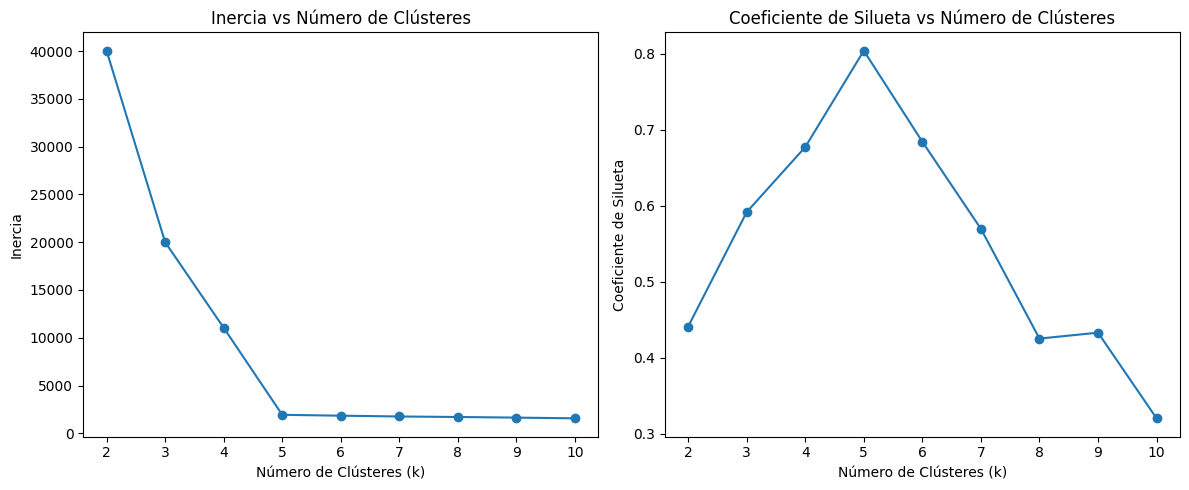

In [30]:
k_values = range(2, 11)

# Lista para almacenar las inercia y coeficiente de silueta
inertia = []
silhouette_scores = []

for k in k_values:
    # Aplicar KMeans con k clústeres
    kmeans = KMeans(n_clusters=k, random_state=0,n_init=2)
    kmeans.fit(df1)
    
    # Guardar la inercia (suma de las distancias intra-clúster)
    inertia.append(kmeans.inertia_)
    
    # Predecir los clústeres
    y_kmeans = kmeans.predict(df1)
    
    # Calcular el coeficiente de silueta (para k > 1)
    silhouette_avg = silhouette_score(df1, y_kmeans)
    silhouette_scores.append(silhouette_avg)

# Graficar la inercia y el coeficiente de silueta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de la inercia
ax1.plot(k_values, inertia, marker='o')
ax1.set_title('Inercia vs Número de Clústeres')
ax1.set_xlabel('Número de Clústeres (k)')
ax1.set_ylabel('Inercia')

# Gráfico del coeficiente de silueta
ax2.plot(k_values, silhouette_scores, marker='o')
ax2.set_title('Coeficiente de Silueta vs Número de Clústeres')
ax2.set_xlabel('Número de Clústeres (k)')
ax2.set_ylabel('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

In [55]:
pca = PCA(n_components=2)
reduce_data = pca.fit_transform(df1)

In [56]:
print(pca.explained_variance_ratio_)

[0.42562774 0.37422988]
